# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&units=imperial" + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0a54ac486b258717733dc35e3b6436a9&units=imperial&q='

In [4]:
# appended lists
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

# set counts for for loop
record_count = 0
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------")
                       
# for loop to grab each cities data
for i, city in enumerate(cities):
    # creates sets during data pull
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    record_count += 1
    
    city_url = query_url + city
    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")    

    
# create dictionary for each cities data
weather_dict = {"City": city_list,
                "Cloudiness": cloudiness_list,
                "Country": country_list,
                "Date": date_list,
                "Humidity": humidity_list,
                "Lat": lat_list,
                "Lng": lng_list,
                "Max_Temp": max_temp_list,
                "Wind_Speed": wind_speed_list}

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | netarhat
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | yar-sale
Processing Record 15 of Set 1 | manaure
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | phan rang
City not found. Skipping...
Processing Record 18 of Set 1 | araguacu
City not found. Skipping...
Processing Record 19 of Set 1 | san quintin
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | kirakira
Processing Recor

Processing Record 39 of Set 4 | sao gabriel da cachoeira
Processing Record 40 of Set 4 | mar del plata
Processing Record 41 of Set 4 | palmer
Processing Record 42 of Set 4 | lalibela
Processing Record 43 of Set 4 | lolua
City not found. Skipping...
Processing Record 44 of Set 4 | marawi
Processing Record 45 of Set 4 | sisimiut
Processing Record 46 of Set 4 | alyangula
Processing Record 47 of Set 4 | borama
City not found. Skipping...
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | avarua
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | hihifo
City not found. Skipping...
Processing Record 3 of Set 5 | santa maria
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | sumbawa
City not found. Skipping...
Processing Record 6 of Set 5 | juneau
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | bainbridge
Processing Record 9 of Set 5 | pocone
Processing Record 

Processing Record 22 of Set 8 | sulechow
Processing Record 23 of Set 8 | payakumbuh
Processing Record 24 of Set 8 | makokou
Processing Record 25 of Set 8 | dunedin
Processing Record 26 of Set 8 | cairns
Processing Record 27 of Set 8 | praia
Processing Record 28 of Set 8 | ndele
City not found. Skipping...
Processing Record 29 of Set 8 | guasdualito
Processing Record 30 of Set 8 | kokopo
Processing Record 31 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 32 of Set 8 | buala
Processing Record 33 of Set 8 | tymovskoye
Processing Record 34 of Set 8 | vaitape
Processing Record 35 of Set 8 | keuruu
Processing Record 36 of Set 8 | bullhead city
Processing Record 37 of Set 8 | de-kastri
Processing Record 38 of Set 8 | male
Processing Record 39 of Set 8 | trairi
Processing Record 40 of Set 8 | port hardy
Processing Record 41 of Set 8 | burnie
Processing Record 42 of Set 8 | kutum
Processing Record 43 of Set 8 | port blair
Processing Record 44 of Set 8 | amahai
Processing Re

Processing Record 12 of Set 12 | dunayivtsi
City not found. Skipping...
Processing Record 13 of Set 12 | lerwick
Processing Record 14 of Set 12 | tomino
Processing Record 15 of Set 12 | biltine
Processing Record 16 of Set 12 | tazovskiy
Processing Record 17 of Set 12 | tocopilla
Processing Record 18 of Set 12 | bakel
Processing Record 19 of Set 12 | prachuap khiri khan
Processing Record 20 of Set 12 | santiago del estero
Processing Record 21 of Set 12 | buin
Processing Record 22 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 23 of Set 12 | bonfim
Processing Record 24 of Set 12 | jalu
Processing Record 25 of Set 12 | priargunsk
Processing Record 26 of Set 12 | lagoa
Processing Record 27 of Set 12 | costa rica
Processing Record 28 of Set 12 | streator
Processing Record 29 of Set 12 | mwene-ditu
Processing Record 30 of Set 12 | gomel
City not found. Skipping...
Processing Record 31 of Set 12 | owasso
Processing Record 32 of Set 12 | nezhinka
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create DataFrame and verify counts
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          528
Cloudiness    528
Country       528
Date          528
Humidity      528
Lat           528
Lng           528
Max_Temp      528
Wind_Speed    528
dtype: int64

In [6]:
#export to csv and display DataFrame
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Alofi,10,NU,1563476031,94,-19.06,-169.92,73.40,8.05
1,Saldanha,0,PT,1563476031,25,41.42,-6.55,86.27,10.20
2,Puerto Ayora,75,EC,1563476031,69,-0.74,-90.35,77.00,17.22
3,Saint George,20,GR,1563476031,53,39.45,22.34,78.80,6.93
4,Vila Franca do Campo,20,PT,1563476032,78,37.72,-25.43,73.40,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

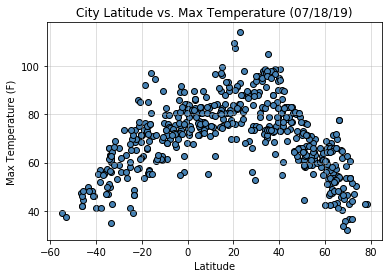

In [7]:
#pull values needed for scatter plot -> latitude & max temperature
lat_coordinates = weather_df["Lat"]
max_temperature = weather_df["Max_Temp"]

# scatter plot and properties
plt.scatter(lat_coordinates, max_temperature, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/18/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha = 0.5)

# save and show image
plt.savefig("Images/latvtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

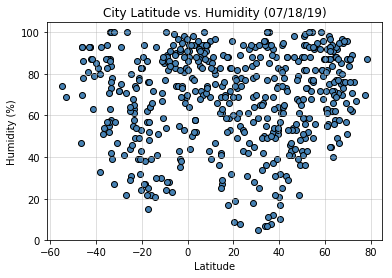

In [8]:
#pull values needed for scatter plot -> latitude & humidity
lat_coordinates = weather_df["Lat"]
humidity_list = weather_df["Humidity"]

# scatter plot and properties
plt.scatter(lat_coordinates, humidity_list, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (07/18/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha = 0.5)

# save and show image
plt.savefig("Images/latvhumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

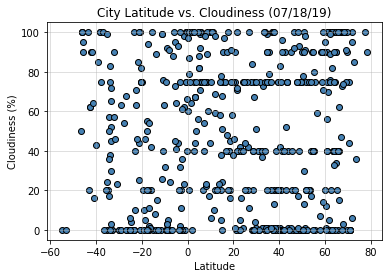

In [9]:
#pull values needed for scatter plot -> latitude & cloudiness
lat_coordinates = weather_df["Lat"]
cloudiness_list = weather_df["Cloudiness"]

# scatter plot and properties
plt.scatter(lat_coordinates, cloudiness_list, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/18/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha = 0.5)

# save and show image
plt.savefig("Images/latvcloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

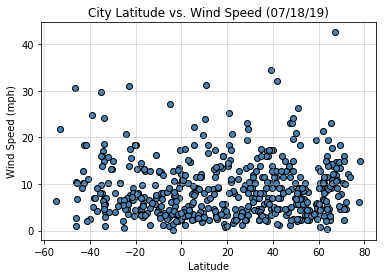

In [10]:
#pull values needed for scatter plot -> latitude & wind speed
lat_coordinates = weather_df["Lat"]
wind_speed_list = weather_df["Wind_Speed"]

# scatter plot and properties
plt.scatter(lat_coordinates, wind_speed_list, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/18/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha = 0.5)

# save and show image
plt.savefig("Images/latvwindspeed.png")
plt.show()